# Random Stack Plot

This notebook creates a reproducible random stacked area (stackplot) showing three categories: Study, Sleep, and Play. The data are generated with NumPy's random generator for repeatability and plotted with Matplotlib.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Use a reproducible RNG (change the seed for different random runs)
rng = np.random.default_rng(2025)
days = np.arange(1, 11)

# Generate three random series representing hours per day
# We pick different ranges to make the stack visually varied
study = rng.integers(1, 6, size=days.size)  # small to medium
sleep = rng.integers(5, 10, size=days.size) # typically larger
play  = rng.integers(0, 6, size=days.size)  # more variable

categories = ['Study', 'Sleep', 'Play']
data = np.vstack([study, sleep, play])  # shape (3, N)

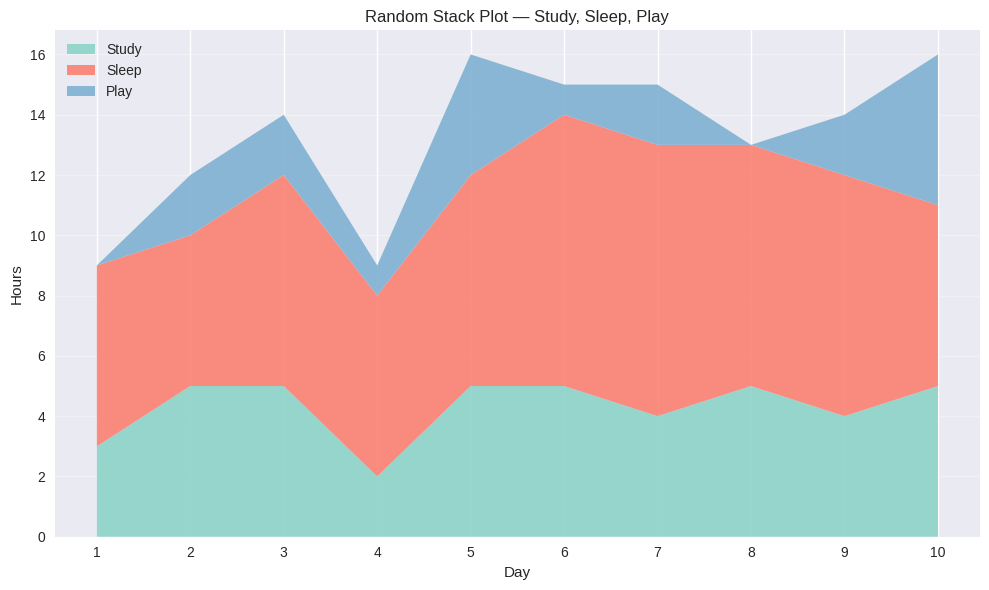

In [5]:
# Plot a stacked area chart
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#8dd3c7', '#fb8072', '#80b1d3']  # pleasant color palette
ax.stackplot(days, data, labels=categories, colors=colors, alpha=0.9)
ax.set_xlabel('Day')
ax.set_ylabel('Hours')
ax.set_title('Random Stack Plot — Study, Sleep, Play')
ax.legend(loc='upper left')
ax.set_xticks(days)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

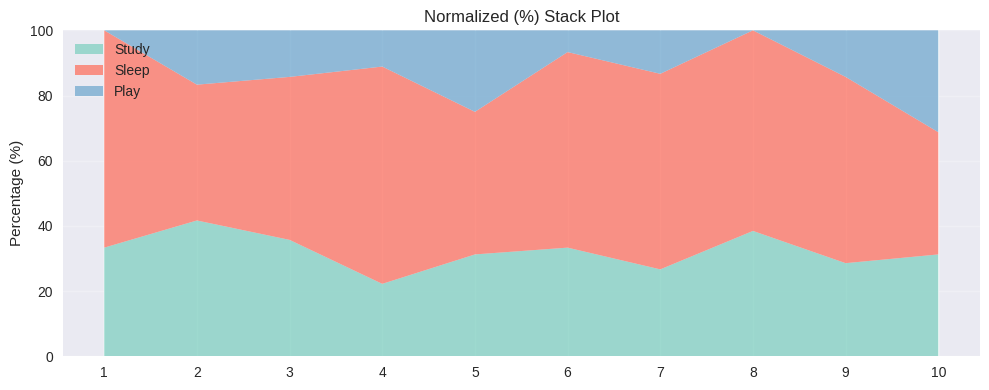

In [6]:
# Optional: normalized (%) stacked area to see composition over time
fig, ax = plt.subplots(figsize=(10, 4))
totals = data.sum(axis=0)
# avoid division by zero (not expected here but good practice)
totals[totals == 0] = 1
percent = data / totals * 100
ax.stackplot(days, percent, labels=categories, colors=colors, alpha=0.85)
ax.set_ylabel('Percentage (%)')
ax.set_title('Normalized (%) Stack Plot')
ax.legend(loc='upper left')
ax.set_ylim(0, 100)
ax.set_xticks(days)
ax.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()